In [40]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

## 분석에 필요한 다양한 라이브러리를 import합니다.
1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
    - <https://pandas.pydata.org/docs/user_guide/index.html>

2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
    - <https://numpy.org/doc/stable/>


3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
    - <https://matplotlib.org/stable/users/index>


4. scikit-learn: 데이터 분석을 위한, 쉽고 효율적인 여러 도구를 제공합니다.
    - <https://scikit-learn.org/stable/user_guide.html>

In [41]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('tox21_dataset.csv')
df = df.dropna(subset=['NR-AR'])
df = df.drop(columns=['NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'])
df = df.drop(columns='mol_id')
df

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,maccs_167,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 데이터 내의 결측값들을 제거합니다.

반응변수, NR-AR을 제외한 다른 반응변수들은 제거합니다.

## 데이터프레임의 전체적인 모습은 위와 같습니다.

0번째 열부터 166번째 열까지는 독립변수이고, 마지막 열은 반응변수(정답값)입니다.

1. 166개의 독립변수는 smiles 형식으로 표현된 화학식을 footprint로 변환한 결과입니다.
2. 반응변수는 NR-AR입니다.
    - 12가지의 독성 분석 중 NR-AR를 선택해, 독성 유무를 예측합니다.

In [42]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## 데이터프레임을 훈련 데이터와 테스트 데이터로 나눕니다.

- 독립 변수는 마지막 열을 제외한 모든 열입니다.
- 종속 변수는 마지막 열입니다.

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

X = X_resampled
y = y_resampled

## SMOTE를 수행할 수 있습니다(선택).

위 코드 블럭은 SMOTE를 이용한 데이터 증강을 수행합니다. SMOTE(Synthetic Minority Over-sampling Technique)는 불균형한 데이터셋에서 소수 클래스 데이터를 증강하는 방법입니다. 데이터셋에는 종종 한 클래스의 데이터가 다른 클래스보다 훨씬 많은 경우가 있습니다. 이러한 불균형한 데이터셋을 다룰 때는 모델이 소수 클래스를 제대로 학습하지 못할 수 있습니다. 이를 해결하기 위해 SMOTE는 소수 클래스의 샘플을 증강하여 데이터셋을 균형있게 만듭니다.
- 더 자세한 내용은 아래의 링크를 참조하세요.
  - <https://arxiv.org/pdf/1106.1813.pdf>

In [44]:
import xgboost as xgb
from xgboost import XGBClassifier


# 로지스틱 회귀 모델 생성
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## 모델을 생성합니다.

생성한 모델은 xgboost입니다.
- xgboost는 트리 기반의 앙상블 학습 방법입니다. random forest와 gradient boosting machine을 결합한 것으로, 빠른 속도와 높은 예측 성능을 가지고 있습니다. xgboost는 아래와 같은 특징을 가지고 있습니다.
1. 정규화: L1, L2 정규화를 포함해, 모델의 복잡성을 제어합니다.
2. 병렬 처리: 병렬 처리를 지원해, 대용량 데이터에 대한 학습이 가능합니다.
3. 자동 가지치기: 불필요한 가지치기를 자동으로 수행해, 과적합을 방지합니다.
4. 결측값 처리: 결측값을 자동으로 처리해, 전처리의 부담을 줄입니다.
5. 내장 교차 검증: 내장된 교차 검증을 통해, 모델의 성능을 평가합니다.

## xgboost은 아래의 하이퍼파라미터를 조정할 수 있습니다.

### 목적함수
$$
\text{Obj}(\Theta) = \sum_{i=1}^{n} l(y_i, \hat{y}i) + \sum_{j=1}^{K} \Omega(f_j)
$$
$$
\Omega(f) = \gamma T + \frac{1}{2}\lambda||w||^2
$$
- $\Theta$는 모델의 파라미터는 의미합니다.
- $l(y_i, \hat{y}_i)$는 i번째 데이터에 대한 손실 함수를 나타냅니다. $y_i$는 실제 값이고, $\hat{y}_i$는 예측 값입니다.
- $\Omega(f_j)$는 j번째 결정 트리에 대한 정규화 항(Complexity)을 나타냅니다.
- $K$는 결정 트리의 갯수를 나타냅니다.

- $T$는 트리의 리프 노드의 갯수를 나타냅니다.
- $w$는 각 리프 노드에서의 출력 값을 나타냅니다.
- $\gamma$와 $\lambda$는 정규화를 위한 하이퍼파라미터입니다.

1. max_depth: 트리의 최대 깊이
2. learning_rate: 학습률
3. n_estimators: 생성할 트리의 개수
4. n_jobs: 사용할 CPU 코어의 개수
5. booster: gbtree, gblinear, dart 중 하나를 선택
6. gamma: 정보 획득에서 사용할 최소 손실 감소량
7. reg_alpha: L1 정규화 계수
8. reg_lambda: L2 정규화 계수
9. scale_pos_weight: 양성 클래스의 가중치
10. max_delta_step: 각 트리의 가중치 추정값의 최대 변화량

- 위의 하이퍼파라미터 외에도 정말 많은 하이퍼파라미터가 있습니다. 자세한 내용은 아래의 링크를 참조하세요.
  - https://xgboost.readthedocs.io/en/latest/parameter.html

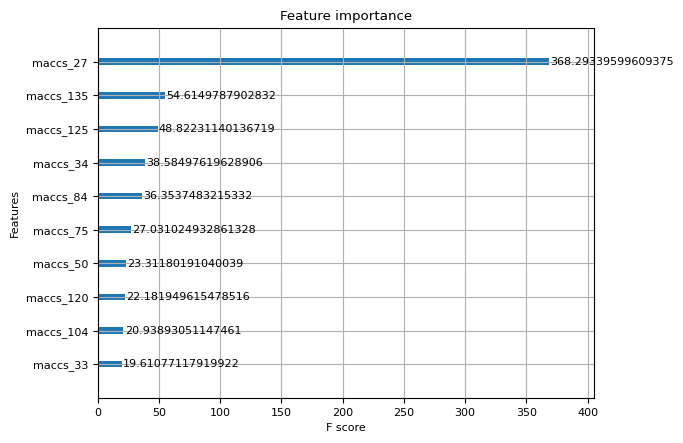

In [45]:
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.show()

## xgboost의 시각화

xgboost는 결정 트리를 기반으로 하는 앙상블 모델이므로, 개별 결정 트리를 시각화할 수 있습니다. 그러나 xgboost는 일반적으로 수십, 수백, 수천개의 트리를 학습시키므로, 모든 트리를 시각화하는 것은 불가능하거나, 그렇게 해도 그다지 도움이 되지 않을 수 있습니다.
xgboost에서는 각 특성이 모델의 예측에 얼마나 중요한 역할을 하는지를 나타내는 특성 중요도를 계산하고 시각화하는 것이 가능합니다. 이를 시각화하면 모델의 예측이 어떤 특성에 의해 주로 영향을 받는지를 파악하는 데 도움이 됩니다

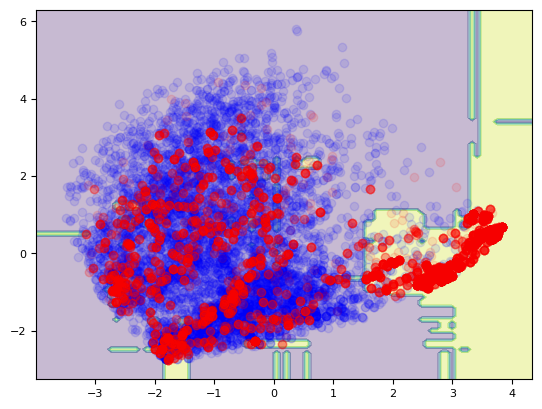

array([[6455,  501],
       [2034, 4922]])

In [46]:
from sklearn.decomposition import PCA

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결정 트리 모델 학습
model_pca = XGBClassifier(max_depth=3, random_state=42)
model_pca.fit(X_pca, y)

# 결정 경계 시각화
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = model_pca.predict(X_new).reshape(x1.shape)

plt.contourf(x1, x2, y_pred, alpha=0.3)
plt.scatter(X_pca[:, 0][y==0], X_pca[:, 1][y==0], color='blue', alpha=0.1)
plt.scatter(X_pca[:, 0][y==1], X_pca[:, 1][y==1], color='red', alpha=0.1)
plt.show()

confusion_matrix(y, model_pca.predict(X_pca))

## 결정 경계 시각화

위 그림은 PCA를 사용하여 피처를 2개로 줄인 후 xgboost를 학습한 결과입니다. 결정 경계가 다소 복잡하게 나타납니다. PCA를 사용하여 피처를 2개로 줄인 이유는 시각화를 위해서입니다. PCA를 사용하여 피처를 2개로 줄이면 결정 경계를 시각화하기 쉽습니다.

In [47]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[6836,  120],
       [  58, 6898]])

## 혼동 행렬을 출력합니다.

혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
- 6952개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
- 4개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
- 40개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
- 269개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)

**SMOTE 증강기법을 사용한 경우, 또는 모델의 하이퍼파라미터 설정값에 따라 분류 결과가 다르게 나타날 수 있습니다.**